## 用DEseq2进行不同表达分析
大量RNA-seq分析的一个重要任务是不同的表达，我们可以用omicverse来执行。对于不同的表达分析，我们先将`gene_id`改为基质的`gene_name`。

现在我们可以像使用R一样使用PyDEseq2来执行DESeq2分析

Paper: [PyDESeq2: a python package for bulk RNA-seq differential expression analysis](https://www.biorxiv.org/content/10.1101/2022.12.14.520412v1)

Code: https://github.com/owkin/PyDESeq2

Colab_Reproducibility：https://colab.research.google.com/drive/1fZS-v0zdIYkXrEoIAM1X5kPoZVfVvY5h?usp=sharing

In [1]:
import omicverse as ov
ov.utils.ov_plot_set()

/slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/torch_geometric/typing.py:54: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/torch_geometric/typing.py:110: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.5, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


请注意，此数据集未经过任何处理，仅由`featurets`导出，序列比对是从`CRCm39`的基因组文件执行的

In [2]:
data=ov.utils.read('../../data/counts.txt',index_col=0,header=1)
#replace the columns `.bam` to `` 
data.columns=[i.split('/')[-1].replace('.bam','') for i in data.columns]
data.head()

,1--1,1--2,2--1,2--2,3--1,3--2,4--1,4--2,4-3,4-4,Blank-1,Blank-2
Geneid,,,,,,,,,,,,
ENSMUSG00000102628,0,0,0,0,5,0,0,0,0,0,0,9
ENSMUSG00000100595,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000097426,5,0,0,0,0,0,0,1,0,0,0,0
ENSMUSG00000104478,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000104385,0,0,0,0,0,0,0,0,0,0,0,0


## ID mapping
我们使用之前下载的作图对文件`GRCm39`进行`gene_id`作图

In [3]:
ov.utils.download_geneid_annotation_pair()

......Geneid Annotation Pair download start: pair_GRCm39
......Downloading dataset save to genesets/pair_GRCm39.tsv
......Creating directory genesets
......[pair_GRCm39 Size of file]: 0.14 MB


KeyboardInterrupt: 

In [4]:
data=ov.bulk.Matrix_ID_mapping(data,'../../data/genesets/pair_GRCm39.tsv')
data.head()

,1--1,1--2,2--1,2--2,3--1,3--2,4--1,4--2,4-3,4-4,Blank-1,Blank-2
Gm5969,0,0,1,0,0,1,0,0,1,0,1,0
Gm18228,0,0,0,0,0,0,0,5,0,0,0,23
Gm11845,0,0,0,0,0,0,0,0,0,0,0,0
Gm10475,0,0,0,0,0,0,0,0,0,0,0,0
B930036N10Rik,0,2,0,3,7,4,12,11,3,3,0,0


## 用ov进行不同表达分析
我们可以通过ov，简单地做微分表达式分析，简单地提供一个表达式矩阵。要运行DEG，我们只需要:
- 通过`featucount`或任何其他限定方法读取原始计数。
- 创建一个ov DEseq对象。

In [5]:
dds=ov.bulk.pyDEG(data)

我们注意到之前的基因名称映射存在一些重复，我们将处理重复索引，只保留表达最高的基因

In [6]:
dds.drop_duplicates_index()
print('... drop_duplicates_index success')

... drop_duplicates_index success


现在我们可以从基质中计算出不同的表达基因，我们需要输入实验组和对照组

In [7]:
treatment_groups=['4-3','4-4']
control_groups=['1--1','1--2']
result=dds.deg_analysis(treatment_groups,control_groups,method='DEseq2')


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 2.81 seconds.

Fitting dispersion trend curve...
... done in 4.64 seconds.

Fitting MAP dispersions...


logres_prior=1.1525716107972193, sigma_prior=0.25


... done in 2.80 seconds.

Fitting LFCs...
... done in 2.21 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: condition Treatment vs Control


... done in 2.09 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Col1a1,423012.679129,0.648338,0.190133,3.409923,0.000650,0.015778
Col3a1,398655.938234,0.361272,0.200556,1.801354,0.071647,0.334175
Col1a2,370437.628127,0.360598,0.219197,1.645087,0.099952,0.397991
Sparc,126788.121467,0.235784,0.200944,1.173382,0.240643,0.607183
Eef1a1,91961.330446,-0.226124,0.175349,-1.289568,0.197201,0.555738
...,...,...,...,...,...,...
Gm49292,0.000000,NaN,NaN,NaN,NaN,NaN
Gm22455,0.000000,NaN,NaN,NaN,NaN,NaN
Gm49162,0.000000,NaN,NaN,NaN,NaN,NaN
Gm45533,0.000000,NaN,NaN,NaN,NaN,NaN


重要的一点是，我们在处理deg时不会过滤掉低表达基因，在未来的版本中，我将考虑在相应的处理中构建。

In [8]:
print(result.shape)
result=result.loc[result['log2(BaseMean)']>1]
print(result.shape)

(54504, 14)
(23377, 14)


我们还需要设置Foldchange的阈值，我们准备一个名为`Foldchange_set`的方法来完成。该函数根据log2FC分布自动计算适当的阈值，但您也可以手动输入。

In [9]:
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=-1,
                   pval_threshold=0.05,
                   logp_max=10)

... Fold change threshold: 1.6248807475128553


可视化DEG结果和特定基因为了可视化DEG结果，我们使用`plot_volcano`来实现。该功能可以可视化感兴趣基因或高不同表达基因。您需要输入一些参数:
- title：火山的标题
- figture：图的大小
- plot_genes：您感兴趣的基因
- plot_genes_num：如果您没有感兴趣的基因，则可以自动绘制它。

<AxesSubplot: title={'center': 'DEG Analysis'}, xlabel='$log_{2}FC$', ylabel='$-log_{10}(qvalue)$'>

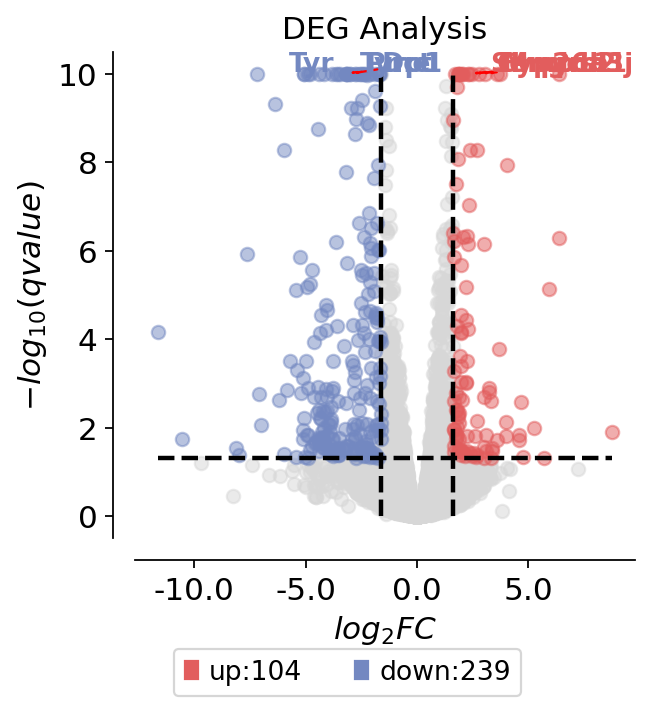

In [10]:
dds.plot_volcano(title='DEG Analysis',figsize=(4,4),
                 plot_genes_num=8,plot_genes_fontsize=12,)

为了可视化特定的基因，我们只需要使用`dds.boxplot`函数来完成绘图。

(<Figure size 160x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'Gene Expression'}>)

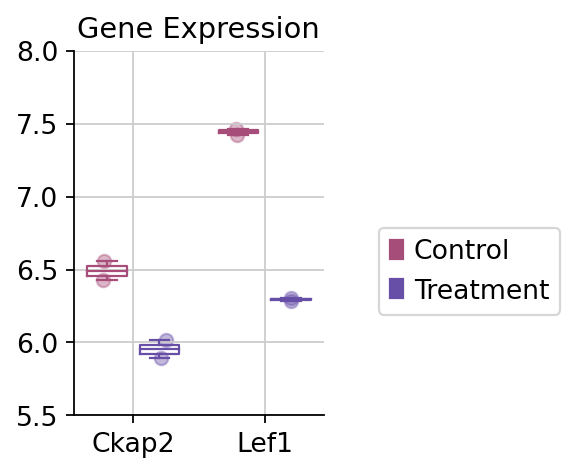

In [11]:
dds.plot_boxplot(genes=['Ckap2','Lef1'],treatment_groups=treatment_groups,
                control_groups=control_groups,figsize=(2,3),fontsize=12,
                 legend_bbox=(2,0.55))

(<Figure size 160x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'Gene Expression'}>)

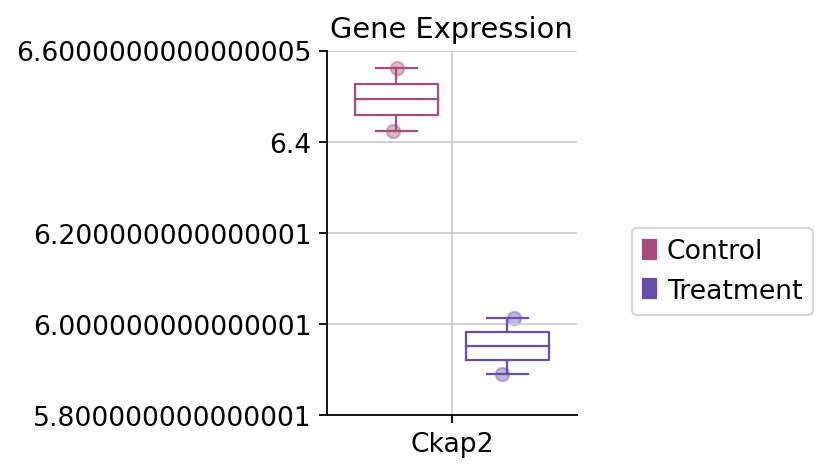

In [12]:
dds.plot_boxplot(genes=['Ckap2'],treatment_groups=treatment_groups,
                control_groups=control_groups,figsize=(2,3),fontsize=12,
                 legend_bbox=(2,0.55))

## 途径富集分析
在这里，我们使用GSAPY软件包，其中包括GSEA分析和富集。我们已经优化了软件包的输出，并给出了一些更好的图形绘图功能
同样，我们需要先下载途径/基因。我们以前准备的五个基因，您可以使用`ov.utils.download_pathway_database()`自动下载。此外，您可以下载您从[`Enrichr`](https://maayanlab.cloud/Enrichr/#libraries)感兴趣的`pathway`：



In [ ]:
ov.utils.download_pathway_database()

In [13]:
pathway_dict=ov.utils.geneset_prepare('../../data/genesets/WikiPathways_2019_Mouse.txt',organism='Mouse')

为了进行GSEA分析，我们首先需要对基因进行排序。使用`dds.Ranking2gsea`可以通过`-log10(padj)`排序得到一个排序基因的矩阵。

$$\text { Metric }=\frac{-\log _{10}(\text { padj })}{\operatorname{sign}(\log 2 F C)}$$

In [15]:
rnk=dds.ranking2gsea()
rnk

,gene_name,rnk
1256,Mmp11,46.360884
2586,Cyp26b1,36.914662
2862,Hmgcs2,35.066117
1794,Serpina3j,30.917401
1062,Igfbp2,28.111930
...,...,...
54499,Gm49292,NaN
54500,Gm22455,NaN
54501,Gm49162,NaN
54502,Gm45533,NaN


我们使用`ov.bulk.pyGSEA`构造一个GSEA对象来执行富集。

In [16]:
gsea_obj=ov.bulk.pyGSEA(rnk,pathway_dict)


In [17]:
enrich_res=gsea_obj.enrichment()

2024-08-28 04:22:17,593 Input gene rankings contains NA values(gene name and ranking value), drop them all!


结果存储在`enrich_re`s属性中。

In [18]:
gsea_obj.enrich_res.head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes,logp,logc,num,fraction,Term,P-value
Term,,,,,,,,,,,,,,
DNA Replication WP150,-0.866774,-2.222590,0.0,0.000000,41,41,Pold4;Uba52;Ubc;Orc4;Rpa3;Orc3;Rfc2;Cdc7;Orc6;...,Orc1;Pold2;Rpa2;Orc2;Pola2;Prim1;Cdc6;Rfc3;Rfc...,9.210340,-2.222590,41,1.000000,DNA Replication WP150,0.000000
TYROBP Causal Network WP3625,0.786245,2.208578,0.0,0.000000,58,57,Itgax;Itgb2;Rgs1;Gpx1;Lhfpl2;Tcirg1;Cxcl16;Cd3...,Itgax;Itgb2;Rgs1;Gpx1;Lhfpl2;Tcirg1;Cxcl16;Cd3...,9.210340,2.208578,57,0.982759,TYROBP Causal Network WP3625,0.000000
Matrix Metalloproteinases WP441,0.879409,2.119113,0.0,0.002962,29,27,Mmp11;Mmp14;Mmp3;Mmp12;Timp4;Timp1;Mmp28;Mmp9;...,Mmp11;Mmp14;Mmp3;Mmp12;Timp4;Timp1;Mmp28;Mmp9;...,5.788691,2.119113,27,0.931034,Matrix Metalloproteinases WP441,0.002962
Oxidation by Cytochrome P450 WP1274,0.772238,2.126563,0.0,0.003949,40,36,Cyp26b1;Cyp2e1;Por;Cyp4b1;Cyp11a1;Cyp4v3;Cyp2f...,Cyp26b1;Cyp2e1;Por;Cyp4b1;Cyp11a1;Cyp4v3;Cyp2f...,5.509207,2.126563,36,0.900000,Oxidation by Cytochrome P450 WP1274,0.003949
Metapathway biotransformation WP1251,0.643711,2.142569,0.0,0.005924,141,120,Cyp26b1;Cyp2e1;Fmo2;Gpx1;Cyp4b1;Cyp11a1;Mgst2;...,Cyp26b1;Cyp2e1;Fmo2;Gpx1;Cyp4b1;Cyp11a1;Mgst2;...,5.112008,2.142569,120,0.851064,Metapathway biotransformation WP1251,0.005924


为了可视化富集分析，我们用`plot_enrichment`来做。
- num:要绘制的富集项目的数目。默认值是10。
- node_size:定义图中节点大小的整数列表。默认值为[5,10,15]。
- cax_loc:颜色条在绘图中的位置。默认值是2。
- cax_fontsize:标签的字体大小。默认值是12。
- fig_title:情节的标题。默认是一个空字符串。
- fig_xlabel: x轴的标签。默认是"基因的一部分"。
- figsize:情节的大小。默认值是(2,4)。
- cmap:用于绘图的颜色图。默认为'YlGnBu'。

<AxesSubplot: title={'center': 'Wiki Pathway Enrichment'}, xlabel='Fractions of genes'>

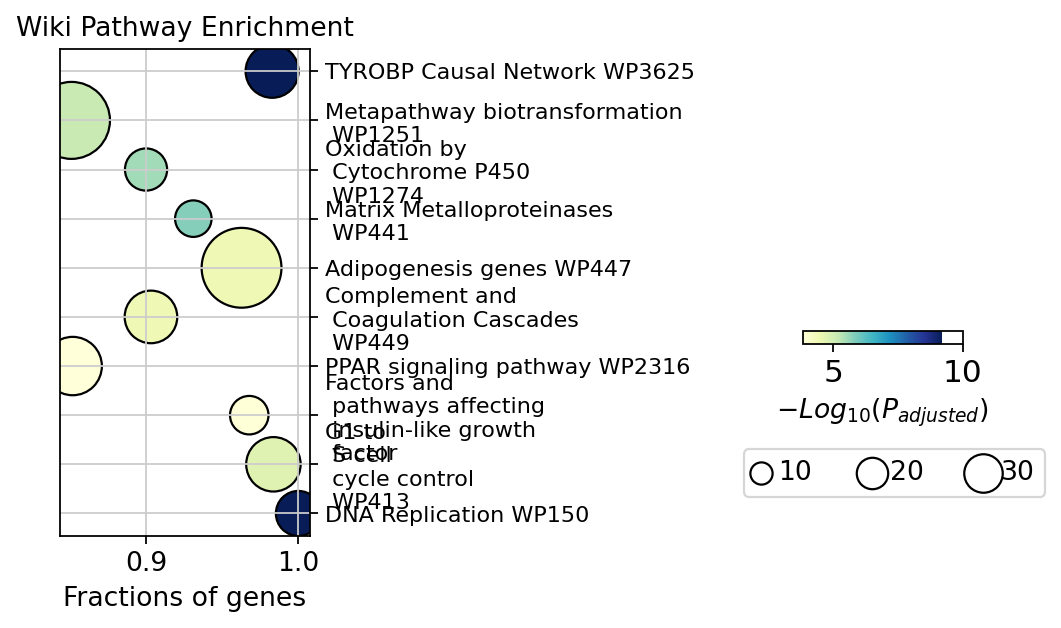

In [21]:
gsea_obj.plot_enrichment(num=10,
                         node_size=[10,20,30],
                         cax_fontsize=12,
                         fig_title='Wiki Pathway Enrichment',
                         fig_xlabel='Fractions of genes',
                         figsize=(2,4),cmap='YlGnBu',
                         text_knock=2,text_maxsize=30,
                         cax_loc=[2.5, 0.45, 0.5, 0.02],
                        #  bbox_to_anchor_used=(-0.25, -13),
                        #  node_diameter=10,
                         )

pyGSEA不仅可以进行基本分析，还可以通过排名和富集分数帮助我们可视化术语。

我们可以选择要绘制的项数，这些项数存储在`gsea_obj.enrich_res.index`, `0`是`Complement and Coagulation Cascades WP449`, `1`是`Matrix Metalloproteinases WP441`

In [22]:
gsea_obj.enrich_res.index[:5]

Index(['DNA Replication WP150', 'TYROBP Causal Network WP3625',
       'Matrix Metalloproteinases WP441',
       'Oxidation by Cytochrome P450 WP1274',
       'Metapathway biotransformation WP1251'],
      dtype='object', name='Term')

我们可以通过设置`gene_set_title`来改变GSEA图的标题

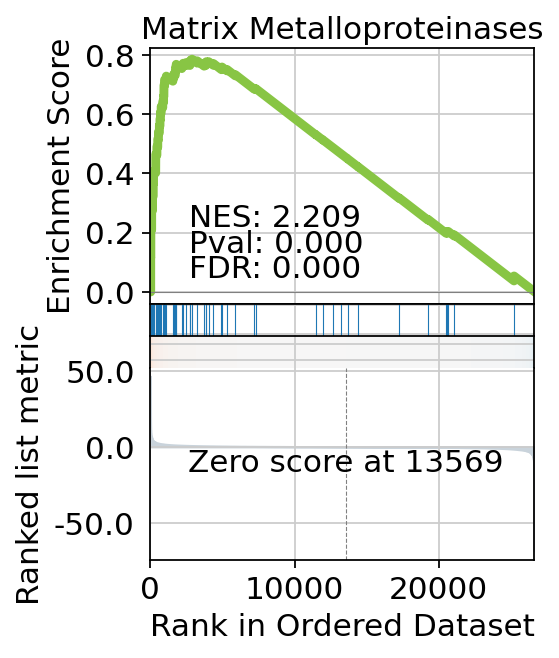

In [23]:
fig=gsea_obj.plot_gsea(term_num=1,
                  gene_set_title='Matrix Metalloproteinases',
                  figsize=(3,4),
                  cmap='RdBu_r',
                  title_fontsize=14,
                  title_y=0.95)